## Load Model


In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "7"

In [2]:
from utils.utils_inference import *

path = "monkey_model"
tokenizer = load_tokenizer(path)
model = load_model(path)

/data/anaconda3/envs/cxt_monkey/lib/python3.9/site-packages/transformers/utils/generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
/data/anaconda3/envs/cxt_monkey/lib/python3.9/site-packages/transformers/utils/generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(


Start loading model...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/data/anaconda3/envs/cxt_monkey/lib/python3.9/site-packages/transformers/modeling_utils.py:479: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_fi

## Load Dataset


In [3]:
import json
from edge_dataset.dataset import EDGETensorDataset

# 1. Create from scratch (need images and annotations (webpages, external icons, llava-instruct-150k, ...) fisrt)
with open("edge_dataset/configs/test.json") as f:
    dataset_meta = json.load(f)["train"]
dataset = EDGETensorDataset(tokenizer, dataset_meta=dataset_meta)
dataset.dump_jsonl_items("edge_dataset/processed/test_data.jsonl")

# 2. Load from a jsonl file (only for previewing QAs, training still requires preparing images in advance)
# dataset = EDGETensorDataset(tokenizer, items_filepath="edge_dataset/processed/test_data.jsonl")

  0%|          | 21/37378 [00:00<00:19, 1937.83it/s]


Read ranking: 37358 pages filtered, 20 left. Additionaly 136 items filtered, 433 left.


  0%|          | 24/103304 [00:00<00:48, 2148.17it/s]


Read autoAnnosLargeNew: 103284 pages filtered, 20 left. Additionaly 231 items filtered, 255 left.


  0%|          | 22/497017 [00:00<05:02, 1642.75it/s]


Read fineweb-edu: 496997 pages filtered, 20 left. Additionaly 165 items filtered, 282 left.
Task **basic**: Successfully read 970 valid elements in 60 pages.


  7%|▋         | 26/350 [00:00<00:00, 3662.53it/s]


Read croppedManual: 330 pages filtered, 20 left. Additionaly 114 items filtered, 242 left.


  1%|          | 26/3826 [00:00<00:01, 2814.17it/s]


Read croppedRanking: 3806 pages filtered, 20 left. Additionaly 143 items filtered, 355 left.
Task **basic_cropped**: Successfully read 852 valid elements in 60 pages.
Task **icon_mixed**: Successfully read 1 file with 50000 images.
Task **icon_mixed_cropped**: Successfully read 1 file with 47950 images.
Task **som**: Successfully read 2 file with 100000 general and 50000 icon_mixed images.
Task **som_cropped**: Successfully read 2 file with 48726 general and 70042 icon_mixed images.
Task **icon_desc**: Successfully read 3 parts of icon annotations.
Task **accessibility**: Successfully read 40 pages.
Task **captioning**: Successfully read 20 pages.
Task **rico_tasks**: 
	widget-grounding: Successfully read 1 files.
	ricosca: Successfully read 1 files.
	screen2words: Successfully read 1 files.
	widget-caption: Successfully read 1 files.
Task **advanced_tasks**: Successfully read: 
	detail: 2419
	function: 2419
	intention: 2419
Task **monkey_training**: Successfully read 1449547 qa_pairs.

100%|██████████| 522/522 [00:00<00:00, 58575.28it/s]

Successfully dump 522 items, with 0 errors.


In [4]:
dataset.get_raw_qa(10, "advanced_tasks", "intention")

{'id': 'advanced_tasks;intention',
 'messages': [{'content': 'Picture 1: <img>../../datasets/anno/annotated/ranking/raw/0001945_top.png</img>\nHow can I return to the main page of this travel website?',
   'role': 'user'},
  {'content': 'You can click on the "Lonely Planet" logo (0.0736, 0.0, 0.1708, 0.0648) in the top left corner to return to the homepage.',
   'role': 'assistant'},
  {'content': "I'm looking to explore different countries for my next vacation. Where should I click?",
   'role': 'user'},
  {'content': 'You should click on the "Destinations" button (0.2, 0.0, 0.2681, 0.0593) in the top menu to explore different countries and regions.',
   'role': 'assistant'},
  {'content': 'Is there a section for trip planning advice?', 'role': 'user'},
  {'content': 'Yes, you can click on the "Planning" button (0.3014, 0.0, 0.3479, 0.0593) in the top menu for trip planning resources and advice.',
   'role': 'assistant'},
  {'content': 'Where can I find ideas for my next adventure?', 

## Manual Inference


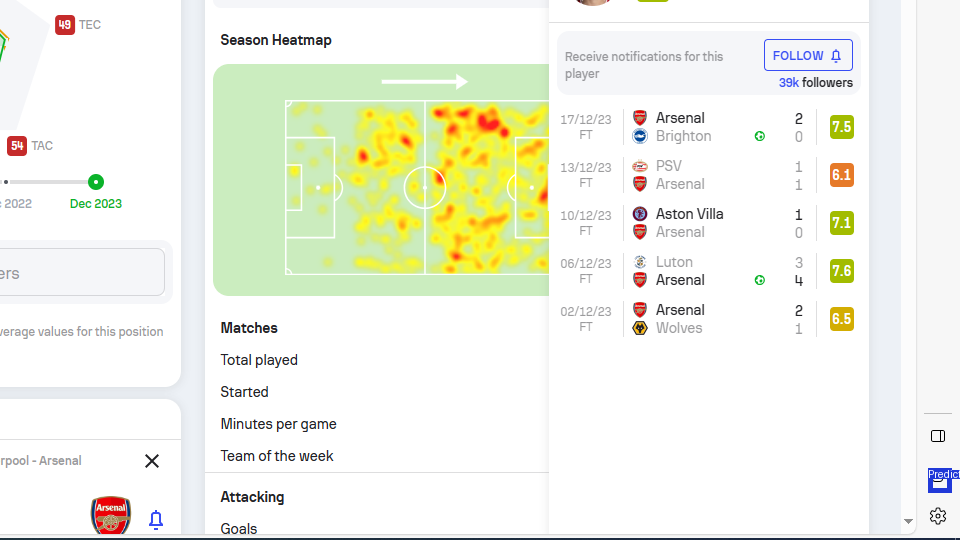

Query: Picture 1:<img>example_images/heatmap.png</img>
How can I share this page with others?

Response: 
You can click on the "Share" button (0.9664, 0.8672, 0.9902, 0.9115) located in the bottom right corner of the page to share the information.



'You can click on the "Share" button (0.9664, 0.8672, 0.9902, 0.9115) located in the bottom right corner of the page to share the information.'

In [5]:
# our provided examples

# img_path = "example_images/iphone.png"
# query = "Where is the icon of Safari? (with bbox (x1, y1, x2, y2))"

img_path = 'example_images/heatmap.png'     
query = "How can I share this page with others?"

# img_path = 'example_images/monitor.png'    
# query = "How can I view the disk usage?"

# img_path = 'example_images/appstore.png'   
# query = "Where should I click to find apps for children? (with point (x, y))"

# img_path = "example_images/vue.png"
# query = "How can I directly use Vue online?"

generate_freeform(model, tokenizer, img_path=img_path, query=query)

In [6]:
# need complete dataset with images
# index = 5
# predict_sample_from_dataset(model, tokenizer, dataset, index, task="rico_tasks", elem_task="ricosca")